<a href="https://colab.research.google.com/github/elramirezn/MetNumUN2022II/blob/main/Lab2/elramirez_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colaboratory link: https://colab.research.google.com/drive/1S2CdYplV_IN7_S9X-IvqUz_hb-DrUp4U?usp=sharing

In [1]:
pip install -U fortran-magic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

NameError: ignored

In [ ]:
del philosophers['David']
philosophers

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 41.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

My own example 1


In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if rows_out == cols_out:
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]
      
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      return "Wrong Matrices Dimensions"

My own example 2


In [ ]:
c = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

d = [[1, 2, 3, 4,5],
     [2, 3, 4, 5,6]]

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


'Wrong Matrices Dimensions'

My own example 3 

In [ ]:
%%time

matmul(c, d)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.4 µs


'Wrong Matrices Dimensions'

My own example 4

In [ ]:
c = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

d = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [6, 7, 8, 9]]

My own example 5

In [ ]:
%%time

matmul(c, d)

CPU times: user 40 µs, sys: 4 µs, total: 44 µs
Wall time: 49.4 µs


[[23, 29, 35, 41], [32, 41, 50, 59], [59, 77, 95, 113], [9, 12, 15, 18]]

My own example 6

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9645510324697146, 0.5074607017135752, 0.38463137074877773],
 [0.9285323388205511, 0.03121310818148293, 0.2809241001210525]]

My own Example 7

In [ ]:
%%time
randC = random_matrix(600, 100)
randD = random_matrix(99, 600)
x = matmul(randC, randD)

CPU times: user 7.4 s, sys: 3.36 ms, total: 7.41 s
Wall time: 7.41 s


In [ ]:
%%time
randa = random_matrix(500, 785)
randb = random_matrix(74, 500)
x = matmul(randa, randb)

CPU times: user 3.88 s, sys: 23.8 ms, total: 3.9 s
Wall time: 3.91 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.2 ms, sys: 807 µs, total: 12 ms
Wall time: 13.9 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 143 µs, sys: 26 µs, total: 169 µs
Wall time: 173 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**600X100 AND 100x600 MATRICES MULTIPLICATION TIME COMPARISON BETWEEN Numpy, C, C++, JavaScript and Java**

My own example 13 - NUMPY



In [ ]:

%%time

import time
py_res  = []
for i in range(10):
  rand_a = np.random.rand(600, 100)
  rand_b = np.random.rand(100, 100)

  #print(type(rand_a))
  #print(type(and_b))}

  start_time = time.time()
  np.matmul(rand_a, rand_b)

  py_res.append(time.time()-start_time)

print('\n'.join(map(str, py_res)))

0.0031502246856689453
0.0007727146148681641
0.0008549690246582031
0.0008270740509033203
0.001585245132446289
0.004329681396484375
0.0006830692291259766
0.0005142688751220703
0.005267143249511719
0.0006203651428222656
CPU times: user 25.4 ms, sys: 17.7 ms, total: 43.1 ms
Wall time: 31.7 ms


My own example 14 - C

In [ ]:
%%writefile matmul.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>


int main(){

  int A[600][100];
  int B[100][100];
  int matC[600][100];

  int test;
  double c_res[10];
  int i, j, k, x, y;
  clock_t t, start_time, end_time;
  double time_lapsed;
  srand((unsigned) time(&t));

  for (test = 0; test < 10; test++){
    
    for (x = 0; x < 600; x++){
      for (y = 0; y < 100; y++){
        A[x][y] = rand() % 50;
      }
    }

    for (x = 0; x < 100; x++){
      for (y = 0; y < 100; y++){
        B[x][y] = rand() % 50;
      }
    }

    start_time = clock();

    for (i = 0; i < 600; i++){
      for (j = 0; j < 100; j++){
        matC[i][j] = 0;
        for (k = 0; k < 100; k++){
          matC[i][j] += A[i][k] * B[k][j];
        }
      }
    }
    end_time = clock();
    
    //int row, columns;
    //for (row=0; row<600; row++){
    //    for(columns=0; columns<100; columns++)
    //    {
    //         printf("%d     ", A[row][columns]);
    //    }
    //    printf("\n");
    //}

    double time_taken = (((double) (end_time - start_time))/ CLOCKS_PER_SEC ) * 1000; // SEC TO MILISECONDS

    printf("%f\n", time_taken);
  }
  
  
  return 0;
}


Overwriting matmul.c


In [ ]:
%%time
!gcc matmul.c -o matmul
!./matmul

34.290000
34.340000
35.930000
33.527000
33.444000
33.926000
34.113000
35.852000
35.974000
39.600000
CPU times: user 20.2 ms, sys: 11.4 ms, total: 31.6 ms
Wall time: 545 ms


My own example 15 - C++

In [ ]:
%%writefile matmul.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>


int main(){

  int A[600][100];
  int B[100][100];
  int matC[600][100];

  int test;
  double c_res[10];
  int i, j, k, x, y;
  clock_t t, start_time, end_time;
  double time_lapsed;
  srand((unsigned) time(&t));

  for (test = 0; test < 10; test++){
    
    for (x = 0; x < 600; x++){
      for (y = 0; y < 100; y++){
        A[x][y] = rand() % 50;
      }
    }

    for (x = 0; x < 100; x++){
      for (y = 0; y < 100; y++){
        B[x][y] = rand() % 50;
      }
    }

    start_time = clock();

    for (i = 0; i < 600; i++){
      for (j = 0; j < 100; j++){
        matC[i][j] = 0;
        for (k = 0; k < 100; k++){
          matC[i][j] += A[i][k] * B[k][j];
        }
      }
    }
    end_time = clock();
    
    //int row, columns;
    //for (row=0; row<600; row++){
    //    for(columns=0; columns<100; columns++)
    //    {
    //         printf("%d     ", A[row][columns]);
    //    }
    //    printf("\n");
    //}

    double time_taken = (((double) (end_time - start_time))/ CLOCKS_PER_SEC ) * 1000; // SEC TO MILISECONDS

    printf("%f\n", time_taken);
  }
  
  
  return 0;
}


Writing matmul.cc


In [ ]:
%%time
!g++ matmul.cc -o matmul
!./matmul

37.643000
38.148000
39.790000
39.145000
37.987000
37.551000
38.303000
39.979000
46.464000
38.040000
CPU times: user 15.1 ms, sys: 20.5 ms, total: 35.6 ms
Wall time: 639 ms


My own example 16 - JAVA

In [ ]:
%%writefile matmul.java

import java.lang.Math;

class Main{

  public static void main(String[] args) {
    
    long start_time, end_time;
    double time_lapsed;

    for (int test = 0; test < 10; test ++){
      int [][] A = new int[600][100];
      int [][] B = new int[100][100];
      int [][] matC = new int[600][100];

      for (int i = 0; i < 600; i++){
        for (int j = 0; j < 100; j++){
          A[i][j] = (int)Math.random() % 50;
        }
      }
      
      //System.out.println("Matrix A done");

      for (int i = 0; i < 100; i++){
        for (int j = 0; j < 100; j++){
          B[i][j] = (int)Math.random() % 50;
        }
      }

      //System.out.println("Matrix B done");

      start_time = System.nanoTime();

      for(int i = 0; i < 600; i++){
        for (int j = 0; j < 100; j++){
          matC[i][j] = 0;
          for(int k = 0; k < 100; k++){
            matC[i][j] += A[i][k] * B[k][j];
          }
        }
      }

      end_time = System.nanoTime();

      time_lapsed = (double)(end_time - start_time) / 1000000; //NANOSECONDS TO MILISECONDS

      System.out.println(time_lapsed);
    }

  }
}

Overwriting matmul.java


In [ ]:
%%time 
!javac matmul.java
!java Main

26.119882
42.330177
53.858013
16.47489
16.052497
16.326034
18.416878
16.047263
18.970129
16.630432
CPU times: user 25.6 ms, sys: 18.1 ms, total: 43.7 ms
Wall time: 1.44 s


My own example 17 - JavaScript

In [ ]:
%%writefile matmul.js

const {performance} = require('perf_hooks');

for( var p = 0; p < 10; p ++){
  var A = generate_matrix(600,100);
  var B = generate_matrix(100,100);
  var matC = generate_matrix(600,100);

  var start_time = performance.now()

  for(var i = 0; i < 600; i++){    
    for(var j = 0; j < 100; j++){    
      matC[i][j] = 0;    
      for(var k=0; k < 100; k++){    
        matC[i][j] += A[i][k] * B[k][j];    
      }    
    }    
  }

  var end_time = performance.now()

  console.log((end_time - start_time))

}

function generate_matrix(m,n){

  var tmp = new Array(m);
  for (var i = 0; i < m; i++) {
    tmp[i] = new Array(n);
  }   

  for (var i = 0; i < m; i++) {
    for (var j = 0; j < n; j++) {
      tmp[i][j] = Math.floor(Math.random() * 10);
    }
  }

  return tmp;
}

Overwriting matmul.js


In [ ]:
%%time 
!node matmul.js

62.847691997885704
62.282313000410795
42.384970001876354
41.652304999530315
42.008623000234365
42.019659999758005
46.95719499886036
46.757679000496864
42.2662380002439
43.01972199976444
CPU times: user 13.6 ms, sys: 10.1 ms, total: 23.7 ms
Wall time: 620 ms


MEASURING AVERAGE TIMES WITH PANDAS

In [ ]:
import pandas as pd

In [ ]:
# times[0] => JavaScript
# times[1] => Java
# times[2] => C++
# times[3] => C
# times[4] => Numpy

times_raw = [
    [62.847691997885704, 62.282313000410795, 42.384970001876354, 41.652304999530315, 42.008623000234365, 42.019659999758005, 46.95719499886036, 46.757679000496864,42.2662380002439, 43.01972199976444],
    [26.119882, 42.330177, 53.858013, 16.47489, 16.052497, 16.326034, 18.416878, 16.047263, 18.970129, 16.630432],
    [37.643000, 38.148000, 39.790000, 39.145000, 37.987000, 37.551000, 38.303000, 39.979000, 46.464000, 38.040000],
    [34.290000, 34.340000, 35.930000, 33.527000, 33.444000, 33.926000, 34.113000, 35.852000, 35.974000, 39.600000],
    [0.00706791877746582, 0.0006930828094482422, 0.0005328655242919922, 0.0007984638214111328, 0.0009846687316894531, 0.0005669593811035156, 0.0005166530609130859, 0.0006117820739746094, 0.0007305145263671875, 0.0005662441253662109]
]


In [ ]:
times = pd.DataFrame(times_raw)
times = times.T
times.columns = ["JavaScript", "Java", "C++", "C", "NumPy"]
times

,JavaScript,Java,C++,C,NumPy
0,62.847692,26.119882,37.643,34.290,0.007068
1,62.282313,42.330177,38.148,34.340,0.000693
2,42.384970,53.858013,39.790,35.930,0.000533
3,41.652305,16.474890,39.145,33.527,0.000798
4,42.008623,16.052497,37.987,33.444,0.000985
5,42.019660,16.326034,37.551,33.926,0.000567
6,46.957195,18.416878,38.303,34.113,0.000517
7,46.757679,16.047263,39.979,35.852,0.000612
8,42.266238,18.970129,46.464,35.974,0.000731
9,43.019722,16.630432,38.040,39.600,0.000566


In [ ]:
res = times[["JavaScript", "Java", "C++", "C", "NumPy"]].mean()
res

JavaScript    47.219640
Java          24.122619
C++           39.305000
C             35.099600
NumPy          0.001307
dtype: float64

Sorting Values From Lesser to Greater

In [ ]:
res.sort_values(ascending=True)

NumPy          0.001307
Java          24.122619
C             35.099600
C++           39.305000
JavaScript    47.219640
dtype: float64

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

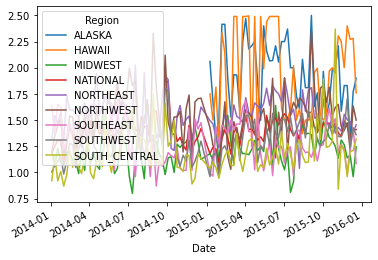

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

MY OWN EXAMPLE

In [ ]:
import pandas as pd

cobertura_canal_13 = pd.read_csv("https://www.datos.gov.co/api/views/utr6-ng67/rows.csv?accessType=DOWNLOAD")

cobertura_canal_13

,Departamento,Municipio,Codigo Dane,Poblacion,Estacion,Canal,LatitudEstacionGrados,LongitudEstacionGrados,LatitudEstacion,LongitudEstacion,Cobertura poblacional,Porcentaje de cobertura departamental.,Valor,Location,Fecha
0,BOGOTA D.C.,BOGOTA D.C.,11001,8883649,CALATRAVA,23,"4°43'39.62""N","74°4'51.46""W",4.727672,-74.080961,2961216,0.3333,0.333333,"Bogotá, D.C., Colombia",11/09/2021 12:00:00 AM
1,BOGOTA D.C.,BOGOTA D.C.,11001,8883649,CRUZ VERDE,23,"4°31'16.86""N","74°4'24.51""W",4.521350,-74.073475,2961216,0.3333,0.333333,"Bogotá, D.C., Colombia",11/09/2021 12:00:00 AM
2,BOGOTA D.C.,BOGOTA D.C.,11001,8883649,MANJUI,13,"4°48'11.03""N","74°23'36.28""W",4.803064,-74.393411,2961216,0.3333,0.333333,"Bogotá, D.C., Colombia",11/09/2021 12:00:00 AM
3,BOYACA,SOCORRO,68755,33105,ALTO DE SABOYA,6,"5°42'53.51""N","73°48'45.41""W",5.714864,-73.812614,33105,0.0243,0.024267,"Boyacá, Colombia",11/09/2021 12:00:00 AM
4,BOYACA,AGUADA,68013,1833,ALTO DE SABOYA,6,"5°42'53.51""N","73°48'45.41""W",5.714864,-73.812614,916,0.0007,0.000672,"Boyacá, Colombia",11/09/2021 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,TOLIMA,IBAGUE,73001,614591,MANJUI,13,"4°48'11.03""N","74°23'36.28""W",4.803064,-74.393411,614591,0.4062,0.406189,"Tolima, Colombia",11/09/2021 12:00:00 AM
177,TOLIMA,LERIDA,73408,17621,MANJUI,13,"4°48'11.03""N","74°23'36.28""W",4.803064,-74.393411,17621,0.0116,0.011646,"Tolima, Colombia",11/09/2021 12:00:00 AM
178,TOLIMA,MARIQUITA,73443,35349,MANJUI,13,"4°48'11.03""N","74°23'36.28""W",4.803064,-74.393411,35349,0.0234,0.023362,"Tolima, Colombia",11/09/2021 12:00:00 AM
179,TOLIMA,NATAGAIMA,73483,23590,CERRO NEIVA,28,"2°48'36.5""N","75°9'43""W",2.810139,-75.161944,23590,0.0156,0.015591,"Tolima, Colombia",11/09/2021 12:00:00 AM


In [ ]:
cobertura_canal_13.dtypes

Departamento                               object
Municipio                                  object
Codigo Dane                                 int64
Poblacion                                   int64
Estacion                                   object
Canal                                       int64
LatitudEstacionGrados                      object
LongitudEstacionGrados                     object
LatitudEstacion                           float64
LongitudEstacion                          float64
Cobertura poblacional                       int64
Porcentaje de cobertura departamental.    float64
Valor                                     float64
Location                                   object
Fecha                                      object
dtype: object

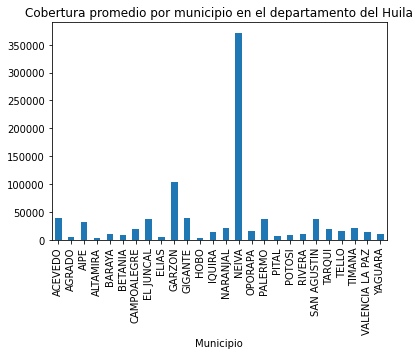

In [ ]:
# Cobertura promedio por municipio en el departamento del Huila
import matplotlib.pyplot as plt

plt.title("Cobertura promedio por municipio en el departamento del Huila")

huila = cobertura_canal_13[cobertura_canal_13.Departamento == 'HUILA']

data = huila.groupby(["Municipio"])["Cobertura poblacional"].mean().plot(kind='bar')
data.axes.get_yaxis().set_visible(True)




In [ ]:
# Los 10 departamentos con menor cobertura de colombia

df = cobertura_canal_13.sort_values(by=['Porcentaje de cobertura departamental.']).head(10)
res = df[['Municipio','Porcentaje de cobertura departamental.']]

res

,Municipio,Porcentaje de cobertura departamental.
4,AGUADA,0.0007
5,AGUADA,0.0007
116,ZIPACON,0.0007
115,ZIPACON,0.0007
114,ZIPACON,0.0007
64,BITUIMA,0.0008
105,NARIÑO,0.0008
96,GUATAQUI,0.0009
65,PULI,0.0011
23,JESUS MARIA,0.0012


# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!